# Greenwashing Detection EDA

## Dataset
- Dataset source : https://arxiv.org/abs/2209.00507 (intutuion and base data, Experts human annoted data)
- Final Datasets : Modified with addition of 160 Greenwashing claims(synthetic data) from emerging makert and industries like Palm oils.
- Datasets hosted on Project folder : https://drive.google.com/file/d/1sD-Hl6qeA0y0rBLBvzMqAzia5t0MC_ov/view

In [7]:
#Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#additonal imports
import requests
import json
import os 
import gdown

In [8]:

# json_file_path = os.path.join('VoyFinance','src', 'tasks', 'task-5-green-washing-detection-model', 'all_3160_environmental_claims.json')
# file_path = r'src\tasks\task-5-green-washing-detection-model\all_3160_environmental_claims.json'

# df = pd.read_json(json_file_path)

In [9]:

file_id = '1sD-Hl6qeA0y0rBLBvzMqAzia5t0MC_ov'

output_file = 'data.json'

gdown.download(f'https://drive.google.com/uc?id={file_id}', output_file, quiet=False)

df = pd.read_json(output_file)

print(df)

Downloading...
From: https://drive.google.com/uc?id=1sD-Hl6qeA0y0rBLBvzMqAzia5t0MC_ov
To: d:\VoyFinance\src\tasks\task-5-green-washing-detection-model\data.json
100%|██████████| 629k/629k [00:00<00:00, 1.31MB/s]


                                                   text label  agreement
0     The project will make a significant contributi...   yes       0.75
1     Many companies and industries are benefitting ...   tie       0.50
2     So in -- first of all, the segments, we are --...    no       1.00
3     A total population of 6148 is getting the bene...   yes       1.00
4     Building a smarter and stronger energy grid th...    no       0.75
...                                                 ...   ...        ...
3155  Investing in sustainable supply chain practice...   yes       0.90
3156  Promoting eco-friendly transportation options ...   yes       0.80
3157  Collaborating with local environmental organiz...   yes       0.85
3158  Supporting local initiatives for renewable ene...   yes       0.90
3159  Investing in green job creation programs enhan...   yes       0.80

[3160 rows x 3 columns]


In [10]:
df.shape

(3160, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       3160 non-null   object 
 1   label      3160 non-null   object 
 2   agreement  3160 non-null   float64
dtypes: float64(1), object(2)
memory usage: 74.2+ KB


In [12]:
df.head()

,text,label,agreement
0,The project will make a significant contributi...,yes,0.75
1,Many companies and industries are benefitting ...,tie,0.50
2,"So in -- first of all, the segments, we are --...",no,1.00
3,A total population of 6148 is getting the bene...,yes,1.00
4,Building a smarter and stronger energy grid th...,no,0.75


In [13]:
#checking missing values
print("\nMissing values check:")
print(df.isnull().sum())


Missing values check:
text         0
label        0
agreement    0
dtype: int64


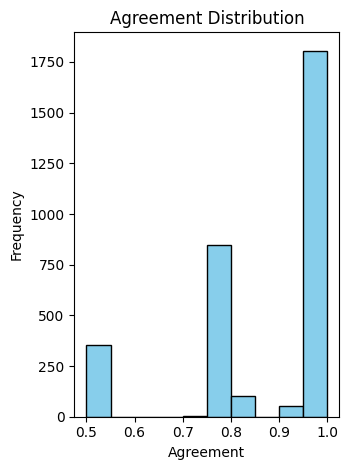

In [14]:
# Histogram for 'Agreement' column
plt.subplot(1, 2, 1)
plt.hist(df['agreement'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Agreement')
plt.ylabel('Frequency')
plt.title('Agreement Distribution')



plt.tight_layout()
plt.show()

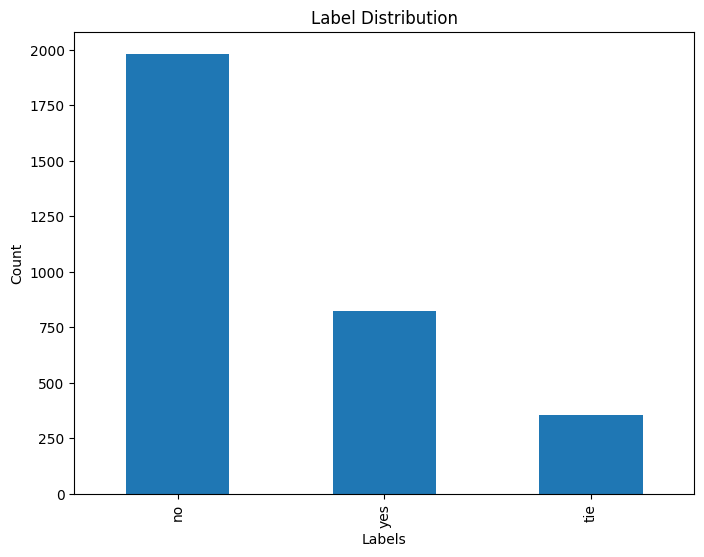

In [15]:
import matplotlib.pyplot as plt

# Visualization of Label Distribution
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

**The dataset shows a significant imbalance in label distribution, where 'no' occurs 1982 times, 'yes' 825 times, and 'tie' 353 times. This skewness might affect model training and suggests potential bias toward the 'no' label.**

In [16]:
#Count of unique labels
print("\nCount of unique labels:")
print(df['label'].value_counts())


Count of unique labels:
label
no     1982
yes     825
tie     353
Name: count, dtype: int64


In [17]:
#Agreement distribution
print("\nAgreement distribution:")
print(df['agreement'].value_counts())


Agreement distribution:
agreement
1.00    1806
0.75     846
0.50     353
0.80      54
0.90      51
0.85      48
0.70       2
Name: count, dtype: int64


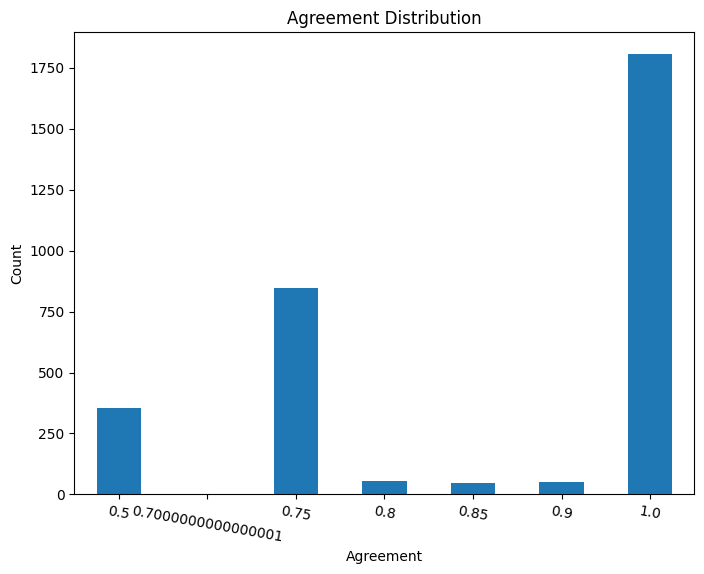

In [18]:
# Plotting the distribution of 'agreement'
plt.figure(figsize=(8, 6))
df['agreement'].value_counts().sort_index().plot(kind='bar')
plt.title('Agreement Distribution')
plt.xlabel('Agreement')
plt.ylabel('Count')
plt.xticks(rotation=350)
plt.show()

The agreement distribution illustrates that the majority of entries have an agreement score of 1.0, accounting for 1806 instances. The frequencies decrease notably for lower agreement scores, with 0.75 having 846 occurrences and 0.50 having 353. Interestingly, scores like 0.80, 0.90, and 0.85 occur infrequently, with 54, 51, and 48 instances, respectively. The scores of 0.70 and below are exceedingly rare, with 0.70 having only 2 occurrences. This pattern suggests a strong tendency towards higher agreement scores

In [19]:
# Text Length Analysis
df['text_length'] = df['text'].apply(len)
print("\nText Length Summary:")
print(df['text_length'].describe())


Text Length Summary:
count    3160.000000
mean      150.243671
std        50.380968
min        45.000000
25%       111.000000
50%       147.000000
75%       186.250000
max       343.000000
Name: text_length, dtype: float64


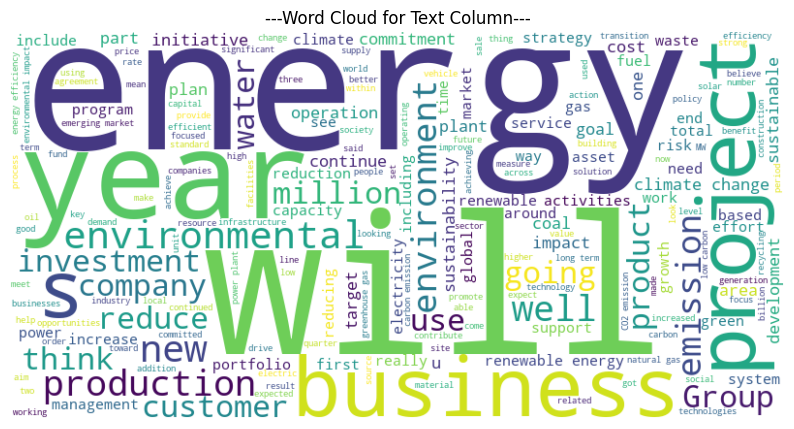

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Combine all text entries into a single string
all_text = ' '.join(df['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('---Word Cloud for Text Column---')
plt.show()

**Note:** Here, Word cloud provides a visual representation of the most frequent words in the 'text' column. Larger and bolder words indicate higher frequency.

Word count for 'no' label: 47891 words


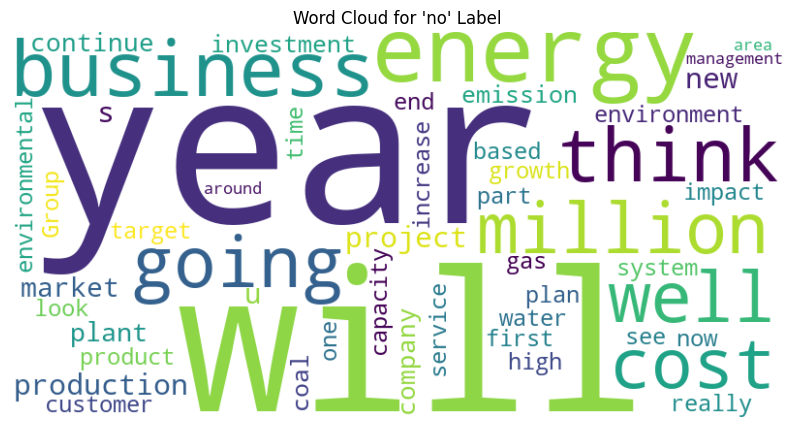


Top 10 common words for 'no' Label:
the: 2340 times
to: 1556 times
and: 1436 times
of: 1395 times
in: 1138 times
a: 790 times
we: 680 times
our: 668 times
that: 644 times
is: 494 times

Top 10 rare words for 'no' Label:
Positive: 1 times
highest-ever: 1 times
evaluated: 1 times
Cornerstone: 1 times
hotspot: 1 times
attain: 1 times
tight: 1 times
platforms,: 1 times
benchmarks: 1 times
Maximum: 1 times
Word count for 'tie' label: 8675 words


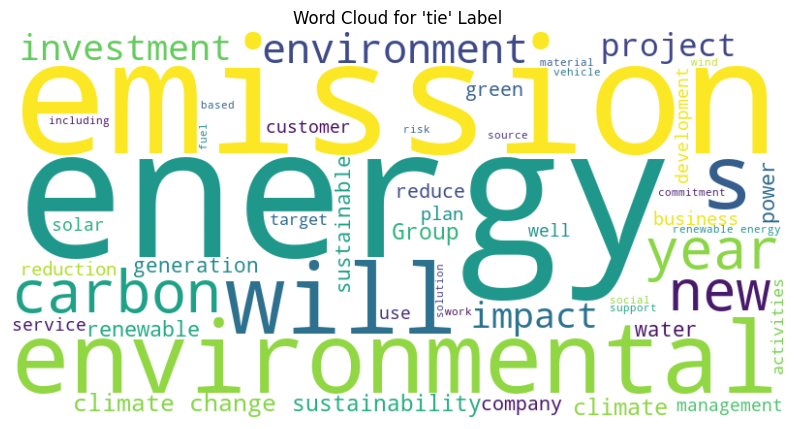


Top 10 common words for 'tie' Label:
the: 407 times
and: 361 times
of: 280 times
to: 241 times
in: 195 times
a: 124 times
our: 113 times
for: 97 times
is: 85 times
energy: 71 times

Top 10 rare words for 'tie' Label:
activity: 1 times
auctions: 1 times
(134MWp): 1 times
objective: 1 times
broad-based: 1 times
regard: 1 times
Fuel: 1 times
retired: 1 times
January: 1 times
operational,: 1 times
Word count for 'yes' label: 19210 words


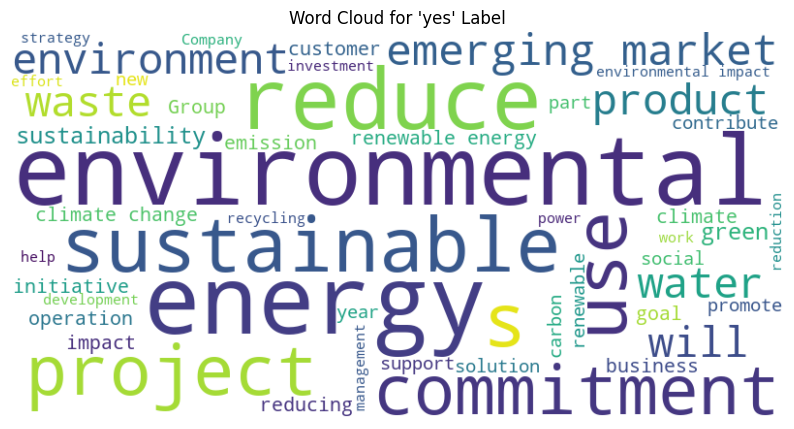


Top 10 common words for 'yes' Label:
to: 798 times
the: 780 times
and: 758 times
of: 568 times
in: 469 times
our: 360 times
a: 260 times
with: 201 times
for: 177 times
energy: 176 times

Top 10 rare words for 'yes' Label:
“The: 1 times
TPP: 1 times
gigajoules,: 1 times
pet: 1 times
prudent: 1 times
LR: 1 times
tremendous: 1 times
Tidy: 1 times
FY: 1 times
Asahi: 1 times


In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Grouping data by labels: Yes, No, and Tie
grouped_data = df.groupby('label')

# Function to generate word cloud and display common/rare words for each label
def generate_word_cloud_and_analyze(data, label_name):
    text = ' '.join(data['text'])
    words_list = text.split()

    # Calculate word count
    word_count = len(words_list)

    print(f"Word count for '{label_name}' label: {word_count} words")

    # Check if word count is zero
    if word_count == 0:
        print(f"No words found for '{label_name}' label.")
    else:
        # Generating WordCloud
        wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for '{label_name}' Label")
        plt.axis('off')
        plt.show()

        # Analyzing common and rare words
        word_frequency = {word: words_list.count(word) for word in set(words_list)}
        sorted_words = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

        # Displaying top 10 common words
        print(f"\nTop 10 common words for '{label_name}' Label:")
        for word, frequency in sorted_words[:10]:
            print(f"{word}: {frequency} times")

        # Displaying top 10 rare words
        print(f"\nTop 10 rare words for '{label_name}' Label:")
        for word, frequency in sorted_words[-10:]:
            print(f"{word}: {frequency} times")

# Generate word clouds and analyze common/rare words for each label
for label, data in grouped_data:
    generate_word_cloud_and_analyze(data, label)